# **Data Collection**

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
# Define full paths to the files in your Shared Drive
grocery_path = "/content/drive/Shareddrives/421Project/Grocery_and_Gourmet_Food.jsonl.gz"
clothes_path = "/content/drive/Shareddrives/421Project/Clothing_Shoes_and_Jewelry.jsonl.gz"
electronics_path = "/content/drive/Shareddrives/421Project/Electronics.jsonl.gz"
meta_grocery_path = "/content/drive/Shareddrives/421Project/meta_Grocery_and_Gourmet_Food.jsonl.gz"
meta_electronics_path = "/content/drive/Shareddrives/421Project/meta_Electronics.jsonl.gz"
meta_clothes_path = "/content/drive/Shareddrives/421Project/meta_Clothing_Shoes_and_Jewelry.jsonl.gz"


In [ ]:
import pandas as pd
import gzip
import json

# file_path"/content/drive/Shareddrives/421Project/.jsonl.gz"

For this project, we retrieved our dataset from the publicly available [Amazon Reviews 2023](https://amazon-reviews-2023.github.io/) repository, which provides large-scale, up-to-date product reviews across various categories.

To ensure a diverse and representative analysis while maintaining efficiency and optimization we selected three distinct departments:

- Grocery & Gourmet Food

- Clothing, Shoes & Jewelry

- Electronics

Each of these departments reflects a unique segment of consumer behavior, allowing us to better explore patterns in review sentiment across different product types.

To balance computational feasibility with dataset richness, we sampled 500,000 rows from each department. This approach gives us a total of 1.5 million reviews, which is large enough for meaningful analysis.

## Condense into 1 df

In [ ]:
# Load the first 600,000 rows from the JSONL.GZ file
df = pd.read_json(grocery_path,
                  lines=True,
                  compression='gzip',
                  nrows=500000)

# Show the available columns
print("📦 Columns in DataFrame:", df.columns)

# Select only the relevant columns
df = df[['text', 'rating', 'parent_asin', 'title', 'verified_purchase']].dropna()


# Display the first few rows correctly
print(df.head())

📦 Columns in DataFrame: Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')
                                                text  rating parent_asin  \
0  Excellent!! Yummy!  Great with other foods and...       5  B00CM36GAQ   
1  Excellent!  The best!  I use it with my beef a...       5  B0759B7KLH   
2  These are very tasty. They are extremely soft ...       5  B079TRNVHX   
3                                       My favorite!       5  B07194LN2Z   
4     Great for making brownies and crinkle cookies.       5  B005CD4196   

                                    title  verified_purchase  
0                      Excellent!  Yummy!               True  
1                       Delicious!!! Yum!               True  
2  Extremely Delicious, but expensive imo               True  
3                              Delicious!               True  
4                             Great taste     

In [ ]:
# Load the first 600,000 rows from the JSONL.GZ file
df = pd.read_json(clothes_path,
                  lines=True,
                  compression='gzip',
                  nrows=500000)

# Show the available columns
print("📦 Columns in DataFrame:", df.columns)

# Select only the relevant columns
df = df[['text', 'rating', 'parent_asin', 'title', 'verified_purchase']].dropna()


# Display the first few rows correctly
print(df.head())

📦 Columns in DataFrame: Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')
                                                text  rating parent_asin  \
0  Unfortunately Amazon in their wisdom (cough, c...       3  B09NSZ5QMF   
1  Useless under 40 degrees unless you’re just ru...       3  B08NGL3X17   
2  I purchased these bc they are supposed to be w...       4  B07RGM3DYC   
3  I’ll start by saying I love this robe!  I trul...       4  B07BWS4CSM   
4  Don't be fooled by the description. I was free...       2  B09GY6SG2C   

                                     title  verified_purchase  
0  Arrived Damaged : liquid in hub locker!               True  
1                Useless under 40 degrees.              False  
2   Not waterproof, but a very comfy shoe.               True  
3        Lovely, but QA issues with sewing               True  
4                                  Just o

In [ ]:
# Load the first 600,000 rows from the JSONL.GZ file
df = pd.read_json(electronics_path,
                  lines=True,
                  compression='gzip',
                  nrows=500000)

# Show the available columns
print("📦 Columns in DataFrame:", df.columns)

# Select only the relevant columns
df = df[['text', 'rating', 'parent_asin', 'title', 'verified_purchase']].dropna()


# Display the first few rows correctly
print(df.head())

📦 Columns in DataFrame: Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')
                                                text  rating parent_asin  \
0  First & most offensive: they reek of gasoline ...       3  B083NRGZMM   
1  These didn’t work. Idk if they were damaged in...       1  B07N69T6TM   
2  I love these. They even come with a carry case...       5  B01G8JO5F2   
3  I was searching for a sturdy backpack for scho...       5  B001OC5JKY   
4  I've bought these headphones three times becau...       5  B07CJYMRWM   

                                         title  verified_purchase  
0            Smells like gasoline! Going back!               True  
1      Didn’t work at all lenses loose/broken.               True  
2                                   Excellent!               True  
3                       Great laptop backpack!               True  
4  Best Headphones in

In [ ]:
df = pd.read_json(meta_grocery_path,
                  lines=True,
                  compression='gzip',
                  nrows=500000)

print("Columns in DataFrame:", df.columns)

df = df[['price', 'parent_asin', 'average_rating', 'rating_number']].dropna()

print(df.head())

Columns in DataFrame: Index(['main_category', 'title', 'average_rating', 'rating_number', 'features',
       'description', 'price', 'images', 'videos', 'store', 'categories',
       'details', 'parent_asin', 'bought_together', 'subtitle', 'author'],
      dtype='object')
   price parent_asin  average_rating  rating_number
1  15.99  B084Q13Q5Q             4.5             12
3  29.99  B0BN4PW255             5.0              6
4  29.99  B06X9DC27H             3.5              5
6  73.57  B002HQF1BI             5.0              2
8  47.86  B019QP6648             4.8             29


In [ ]:
df = pd.read_json(meta_clothes_path,
                  lines=True,
                  compression='gzip',
                  nrows=500000)

df = df[['price', 'parent_asin', 'average_rating', 'rating_number']].dropna()



In [ ]:
df = pd.read_json(meta_electronics_path,
                  lines=True,
                  compression='gzip',
                  nrows=500000)

df = df[['price', 'parent_asin', 'average_rating', 'rating_number']].dropna()


In [ ]:
import gc
### ---- Grocery Dataset ---- ###

# Read and filter review data
df1 = pd.read_json(grocery_path, lines=True, compression='gzip', nrows=500000)
df1 = df1[['text', 'rating', 'parent_asin', 'title', 'verified_purchase']].dropna()

# Read and filter metadata
df2 = pd.read_json(meta_grocery_path, lines=True, compression='gzip', nrows=500000)
df2 = df2[['price', 'parent_asin']].dropna()

# Merge on parent_asin
df_grocery = pd.merge(df1, df2, on='parent_asin', how='inner')

# Save and free memory
## df_grocery.to_csv('/content/drive/MyDrive/df_grocery.csv', index=False)
## del df1, df2, df_grocery
gc.collect()


0

In [ ]:

### ---- Clothes Dataset ---- ###

# Read and filter review data
df3 = pd.read_json(clothes_path, lines=True, compression='gzip', nrows=500000)
df3 = df3[['text', 'rating', 'parent_asin', 'title', 'verified_purchase']].dropna()

# Read and filter metadata
df4 = pd.read_json(meta_clothes_path, lines=True, compression='gzip', nrows=500000)
df4 = df4[['price', 'parent_asin']].dropna()

# Merge on parent_asin
df_clothes = pd.merge(df3, df4, on='parent_asin', how='inner')

# Save and free memory
## df_clothes.to_csv('/content/drive/MyDrive/df_clothes.csv', index=False)
## del df3, df4, df_clothes
gc.collect()

In [ ]:
### ---- Electronics Dataset ---- ###

df5 = pd.read_json(electronics_path, lines=True, compression='gzip', nrows=500000)
df5 = df5[['text', 'rating', 'parent_asin', 'title', 'verified_purchase']].dropna()

df6 = pd.read_json(meta_electronics_path, lines=True, compression='gzip', nrows=500000)
df6 = df6[['price', 'parent_asin']].dropna()

df_electronics = pd.merge(df5, df6, on='parent_asin', how='inner')

# Save electronics dataset
## df_electronics.to_csv('/content/drive/MyDrive/df_electronics.csv', index=False)

# Clean up
## del df5, df6, df_electronics
gc.collect()

In [ ]:
### ---- Combine All Three Datasets ---- ###

# Load saved CSVs
df_grocery = pd.read_csv('/content/drive/MyDrive/df_grocery.csv')
df_clothes = pd.read_csv('/content/drive/MyDrive/df_clothes.csv')
df_electronics = pd.read_csv('/content/drive/MyDrive/df_electronics.csv')

# Concatenate everything
df_combined = pd.concat([df_grocery, df_clothes, df_electronics], ignore_index=True)

# Save combined dataset
## df_combined.to_csv('/content/drive/MyDrive/df_combined.csv', index=False)

# Final memory clean up
## del df_grocery, df_clothes, df_electronics, df_combined
gc.collect()

# **Data Cleaning**

In [ ]:
new_df = pd.read_csv('/content/drive/Shareddrives/421Project/df_combined.csv')


In [ ]:
new_df['full_text'] = new_df['title'].fillna('') + ' ' + new_df['text'].fillna('')

In [ ]:
new_df = new_df.drop(columns=['text', 'title'])

In [ ]:
new_df = new_df.dropna(subset=['full_text'])
new_df = new_df.drop_duplicates(subset=['full_text'])


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()                         # lowercase
    text = re.sub(r'<.*?>', '', text)           # remove HTML
    text = re.sub(r'http\S+', '', text)         # remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)     # remove non-alphabetic chars
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

new_df['cleaned_review'] = new_df['full_text'].apply(clean_text)

In [ ]:
new_df = new_df.drop(columns=['full_text'])

In [ ]:
from google.colab import files
new_df.to_csv('cleaned_reviews_trial.csv', index=False)
files.download('cleaned_reviews_trial.csv')

In [ ]:
a_df = pd.read_csv('/content/drive/Shareddrives/421Project/cleaned_reviews_trial.csv')
a_df = a_df.drop(columns=['rating', 'parent_asin', 'verified_purchase', 'price'])

In [ ]:
print(a_df['cleaned_review'].map(type).value_counts())

In [ ]:
a_df = a_df.dropna(subset=['cleaned_review'])

In [ ]:
import pandas as pd
import spacy

# Load data
a_df = pd.read_csv('/content/drive/Shareddrives/421Project/cleaned_reviews_trial.csv')

# Convert reviews to strings to avoid float errors
a_df['cleaned_review'] = a_df['cleaned_review'].astype(str)

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Lemmatization function
def lemmatize(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if not token.is_stop and token.is_alpha])

# Apply to dataframe
a_df['full_clean_text'] = a_df['cleaned_review'].apply(lemmatize)

# Preview results
a_df[['cleaned_review', 'full_clean_text']].head()

# Save the DataFrame to a CSV file in your Drive
## a_df.to_csv('/content/drive/Shareddrives/421Project/cleaned_reviews_lemmatized.csv', index=False)
print("DataFrame saved to CSV in your Drive!")

In [ ]:
a_df = pd.read_csv('/content/drive/Shareddrives/421Project/cleaned_reviews_lemmatized.csv')
# Convert True/False to 1/0
a_df['verified_purchase'] = a_df['verified_purchase'].astype(int)

# Drop original cleaned review column
a_df.drop(columns=['cleaned_review'], inplace=True)

# Save to new CSV
## a_df.to_csv('/content/drive/Shareddrives/421Project/finalreviews.csv', index=False)


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/421Project/finalreviews.csv')

In [ ]:
df['full_clean_text'].isna().sum()


In [ ]:
df = df.dropna(subset=['full_clean_text'])


In [ ]:
df['full_clean_text'].isna().sum()


# **Data Visualization**

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/421Project/finalreviews.csv')
df.head()

<ipython-input-8-79fb6c6ee5ee>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/Shareddrives/421Project/finalreviews.csv')


,rating,parent_asin,verified_purchase,price,full_clean_text
0,5,B00CM36GAQ,1,24.96,excellent yummy excellent yummy great food great
1,5,B0759B7KLH,1,35.52,delicious yum excellent good use beef broccoli...
2,5,B005CD4196,1,2.78,great taste great making brownie crinkle cookie
3,5,B0BG8M4XW7,1,17.87,yummy yummy tummy
4,5,B00ESE0DC4,1,8.34,like drink wedding bouquet favorite tea favori...


In [ ]:
# Function to classify sentiment
def label_sentiment(rating):
    if rating in [1, 2]:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

# Apply the function
df['sentiment'] = df['rating'].apply(label_sentiment)
display(df[['rating', 'sentiment']].head())

,rating,sentiment
0,5,positive
1,5,positive
2,5,positive
3,5,positive
4,5,positive


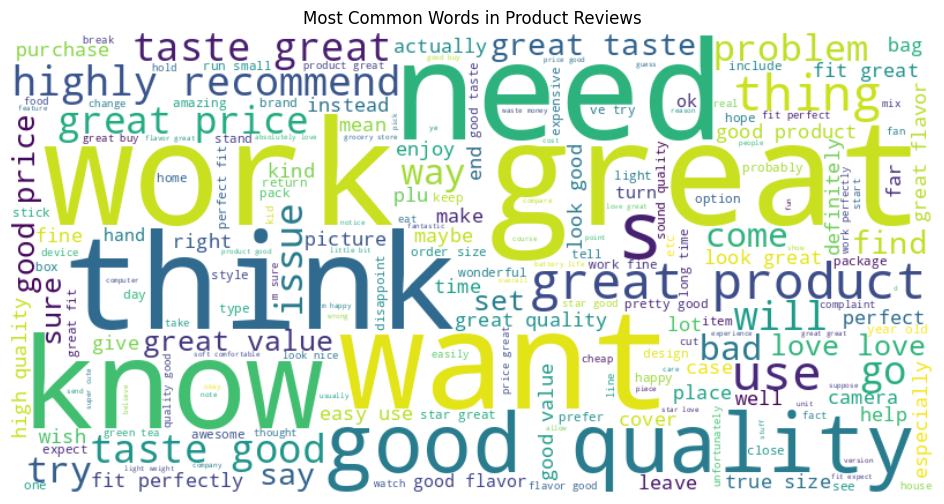

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into one giant string
all_text = ' '.join(df['full_clean_text'].dropna())

# Create the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    colormap='viridis'
).generate(all_text)

# Display it
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Product Reviews')
plt.show()


<ipython-input-11-ef9c8e7fe87b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='pastel')


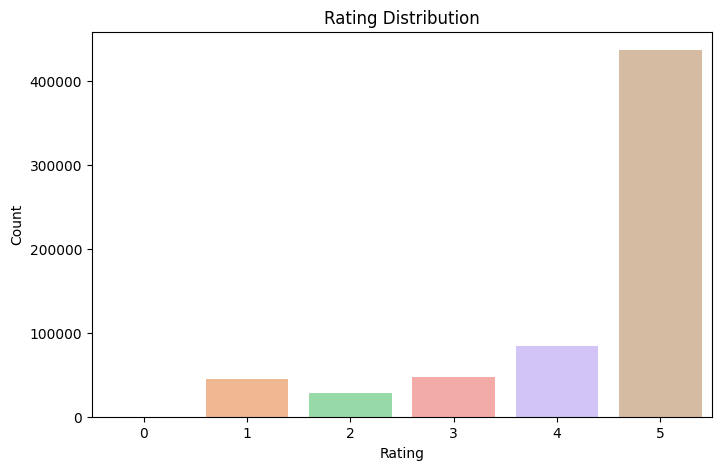

In [ ]:
# Plot rating distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=df, palette='pastel')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

We can see that there is a class imbalance. We want to keep this in mind when creating the ML models in order to assign appropriate weights to each class.

<ipython-input-12-5c7ed64e7915>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='text_length', data=df, palette='muted')


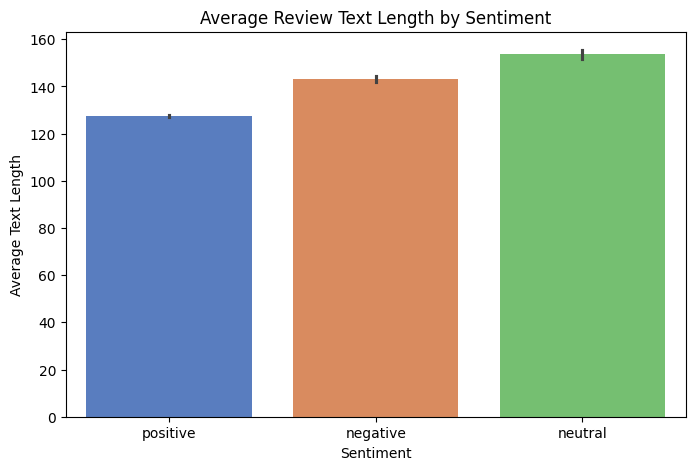

In [ ]:
# Plot average text length by sentiment
# Compute text length
df['text_length'] = df['full_clean_text'].astype(str).apply(len)

# Plot average text length per sentiment class
plt.figure(figsize=(8, 5))
sns.barplot(x='sentiment', y='text_length', data=df, palette='muted')
plt.title('Average Review Text Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Text Length')
plt.show()

Neutral reviews tend to have the longest review length, while positive tend to have the shortest.

<ipython-input-13-1afc06c2bf3c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='verified_purchase', data=df, palette='Set2')


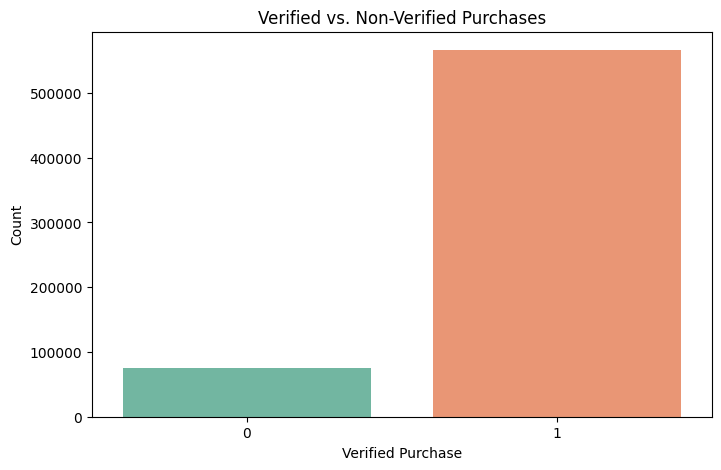

In [ ]:
# Count verified vs non-verified purchases
plt.figure(figsize=(8, 5))
sns.countplot(x='verified_purchase', data=df, palette='Set2')
plt.title('Verified vs. Non-Verified Purchases')
plt.xlabel('Verified Purchase')
plt.ylabel('Count')
plt.show()

There are very few non verified purchases, meaning the item wasnt purchased through amazon. Let's see if non-verified purchasers make a significant difference when it comes to reviews:

Text(0.5, 1.0, 'Sentiment by Verified Purchase Status')

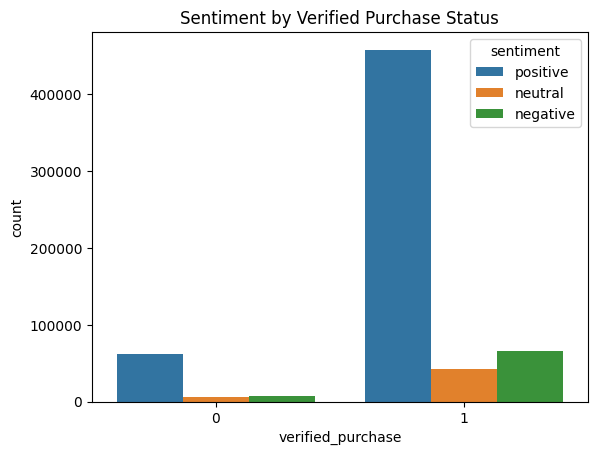

In [ ]:
sns.countplot(x='verified_purchase', hue='sentiment', data=df)
plt.title('Sentiment by Verified Purchase Status')

We can see that there is nothing to worry about because the non-verified purchase reviews mirror the verified purchase reviews sentiment at a smaller scale.

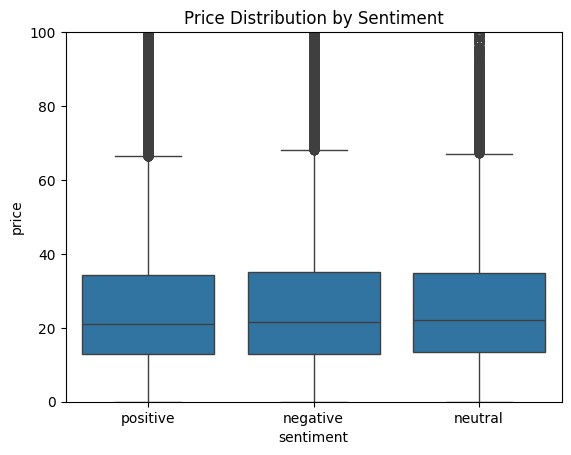

In [ ]:
# Boxplot price by sentiment
# See if more expensive products tend to get more positive reviews.

df['price'] = df['price'].astype(str)

# Replace em-dash and other non-numeric characters with NaN
df['price'] = pd.to_numeric(df['price'].str.replace('[^0-9.]', '', regex=True), errors='coerce')

# Drop rows with NaN in 'price' column if needed
df.dropna(subset=['price'], inplace=True)

sns.boxplot(x='sentiment', y='price', data=df)
plt.title('Price Distribution by Sentiment')

# Set y-axis to use ScalarFormatter and reduce scale
from matplotlib.ticker import ScalarFormatter
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Set a smaller range for the y-axis (adjust as needed)
plt.ylim(0, 100)  # Example: Show prices from 0 to 100

plt.show()

The median price for products is similar accross all sentiments, ranging from about $23-25. We can also note that negative reviews are slightly skewed higher. This suggests that there are more complaints for pricier items, possibly due to higher expectations

There is no strong relationship between price and sentiment at a glance.

However, we could further explore:

Does price significantly predict sentiment with a statistical test? (e.g., ANOVA or Kruskal-Wallis)

Do high-priced products get more polarizing reviews?

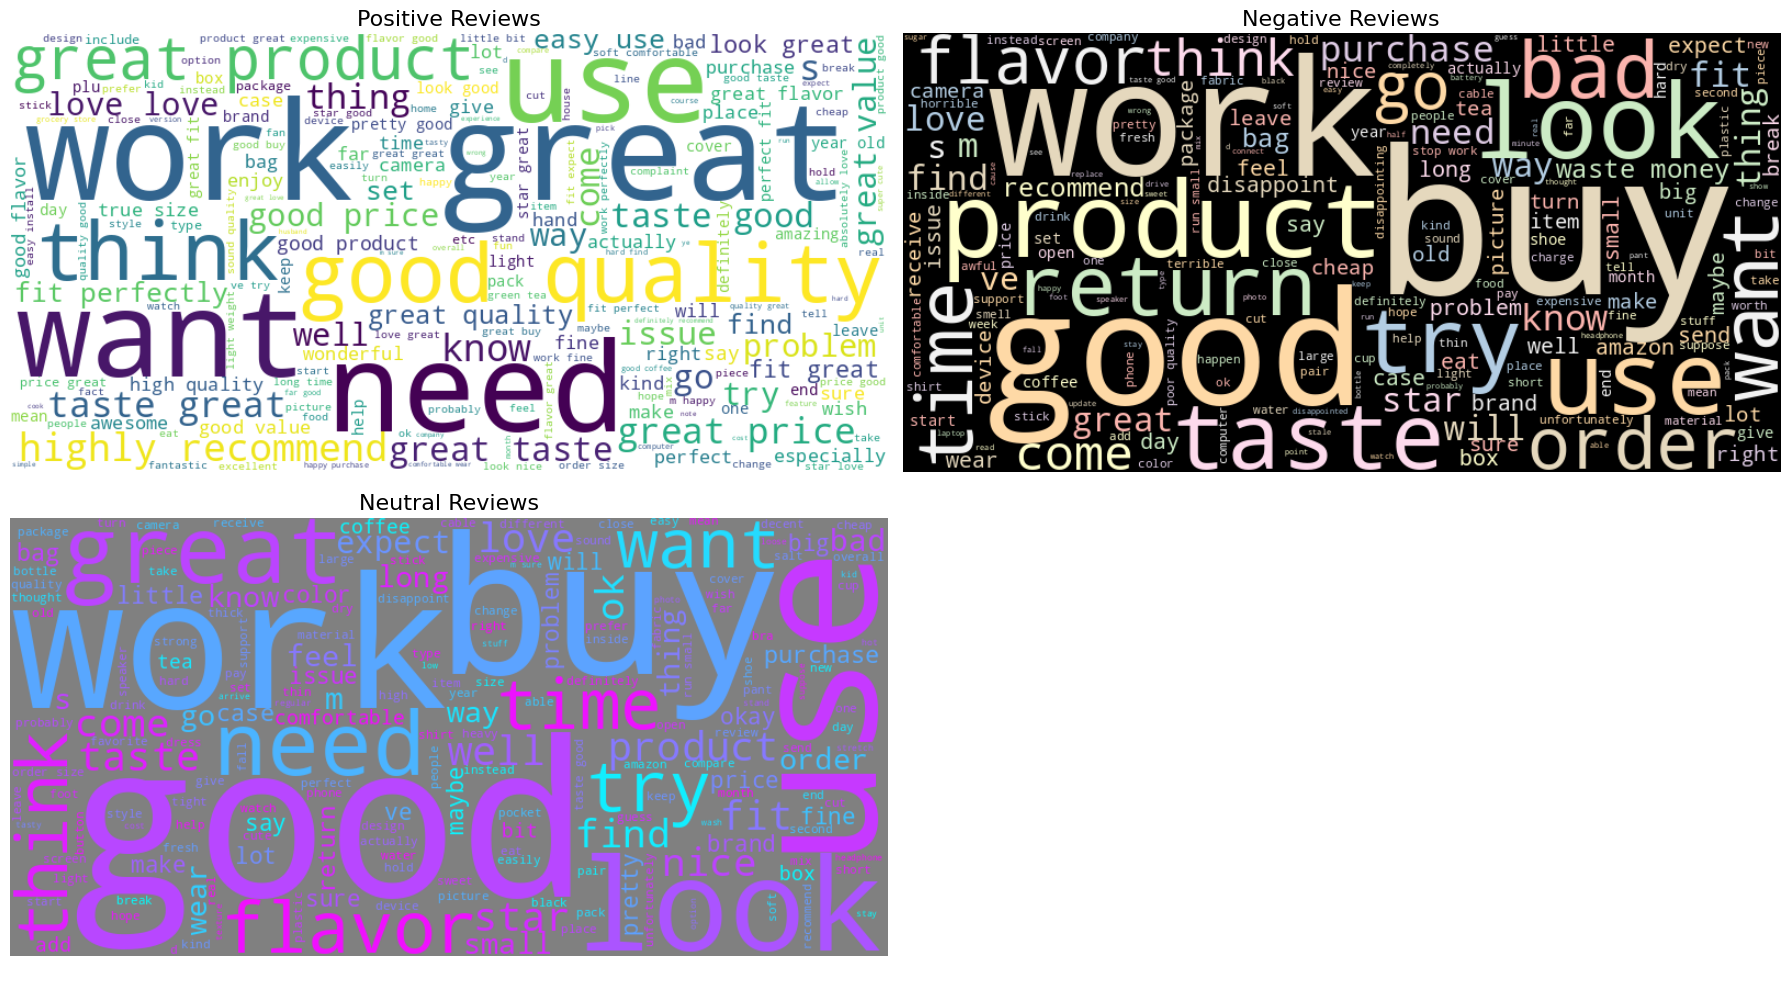

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join text by sentiment
positive_text = " ".join(df[df['sentiment'] == 'positive']['full_clean_text'].dropna())
negative_text = " ".join(df[df['sentiment'] == 'negative']['full_clean_text'].dropna())
neutral_text = " ".join(df[df['sentiment'] == 'neutral']['full_clean_text'].dropna())

# Generate word clouds
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Pastel1').generate(negative_text)
wordcloud_neu = WordCloud(width=800, height=400, background_color='gray', colormap='cool').generate(neutral_text)

# Create 2-over-1 layout
fig, axs = plt.subplots(2, 2, figsize=(18, 10))

# Turn off the unused top-right axis to make room for the bottom
axs[1, 1].axis('off')

# Top row: positive and negative
axs[0, 0].imshow(wordcloud_pos, interpolation='bilinear')
axs[0, 0].set_title('Positive Reviews', fontsize=16)
axs[0, 0].axis('off')

axs[0, 1].imshow(wordcloud_neg, interpolation='bilinear')
axs[0, 1].set_title('Negative Reviews', fontsize=16)
axs[0, 1].axis('off')

# Bottom row center: neutral
axs[1, 0].imshow(wordcloud_neu, interpolation='bilinear')
axs[1, 0].set_title('Neutral Reviews', fontsize=16)
axs[1, 0].axis('off')

plt.tight_layout()
plt.show()

1. Common Themes Across All Sentiments
Words like:

  “work”, “good”, “use”, “think”, “buy”, and “want” appear in all clouds.

  This indicates these are central ideas in reviews regardless of tone—people focus on functionality, intent, and experience.

2. Positive Reviews
  Most Prominent Words:

  “great”, “quality”, “perfect”, “fit”, “highly”, “recommend”, “amazing”

  Interpretation:

  - Positive reviews highlight satisfaction with performance, fit, and value.

  - Words like “perfect” and “highly recommend” suggest strong product endorsement.

  - There's a strong focus on expectations being met or exceeded.

3. Negative Reviews
  Most Prominent Words:

  “return”, “bad”, “problem”, “disappoint”, “small”, “stop”, “wait”, “broke”, “expected”

  Interpretation:

  - Customers frequently express product failure, mismatch in expectations, or quality issues.

  - “Return” is huge—indicating a common action taken following dissatisfaction.

  - Words like “small”, “broke”, “bad” suggest issues with sizing, durability, and quality control.

4. Neutral Reviews
  Most Prominent Words:

  “okay”, “nice”, “fit”, “small”, “long”, “return”, “expect”

  Interpretation:

  - Neutral sentiment seems to reflect mixed or lukewarm experiences.

  - Common words overlap with both positive and negative reviews, but without intense modifiers like “great” or “terrible”.

  - “Nice” and “okay” show ambivalence—not bad enough to return, not good enough to praise strongly.


# **VADER-Based Sentiment Analysis**

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon if you haven’t already
nltk.download('vader_lexicon')

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Apply VADER to your lemmatized text
df['vader_score'] = df['full_clean_text'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

# Classify the compound score into sentiment categories
def vader_class(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['vader_sentiment'] = df['vader_score'].apply(vader_class)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Note the following:
- The VADER process is a Rule-Based model. (i.e there is no training needed for the model)
- We can compare our future ML models to VADER's performance and if it cannot beat VADER, we will re-evaulate.
- If VADER gives reasonable predictions that match rating-based sentiment, it tells us:
  - Text is clean
  - Sentiment Labeling is Logical
  - Tokenization worked
- VADER struggles with sarcasm
  - You can spot where it fails and design features (or model types like BERT) to address those.
- VADER lets us Visualize Trends

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(df['sentiment'], df['vader_sentiment']))


              precision    recall  f1-score   support

    negative       0.56      0.37      0.45     73172
     neutral       0.13      0.09      0.11     47828
    positive       0.87      0.94      0.90    520782

    accuracy                           0.81    641782
   macro avg       0.52      0.47      0.49    641782
weighted avg       0.78      0.81      0.79    641782



- Positive sentiment is classified very well:

  - High precision (0.87) → VADER is right when it says something is positive.

  - High recall (0.94) → VADER finds almost all positive reviews.

  - Great F1-score (0.90) → Excellent balance between precision and recall.
- Neutral reviews are barely detected:

  - Precision: 0.13 → only 13% of predicted neutrals are correct.

  - Recall: 0.09 → finds only 9% of actual neutral reviews.

This is expected because as stated previously: VADER struggles with sarcasm, mixed signals, or short texts.(This is where many neutral ratings stand)

- Negative is decent, but:

  - Precision is fair (0.56), but recall is low (0.37) (i.e VADER misses many negative reviews.)



## More Plots(Based on VADER analysis)

<ipython-input-15-497985c01187>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='vader_sentiment', order=['positive', 'neutral', 'negative'], palette='coolwarm')


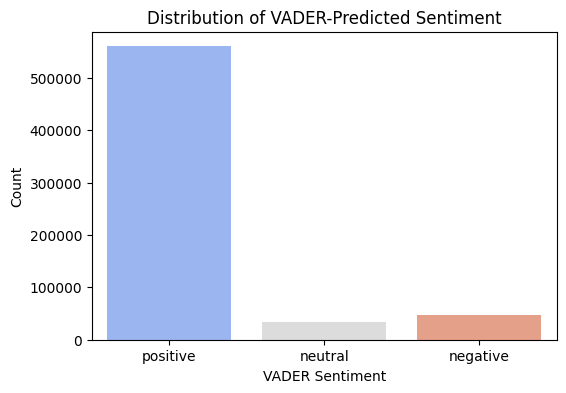

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='vader_sentiment', order=['positive', 'neutral', 'negative'], palette='coolwarm')
plt.title('Distribution of VADER-Predicted Sentiment')
plt.xlabel('VADER Sentiment')
plt.ylabel('Count')
plt.show()


<ipython-input-16-4049305b0770>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', order=['positive', 'neutral', 'negative'], palette='Set2')


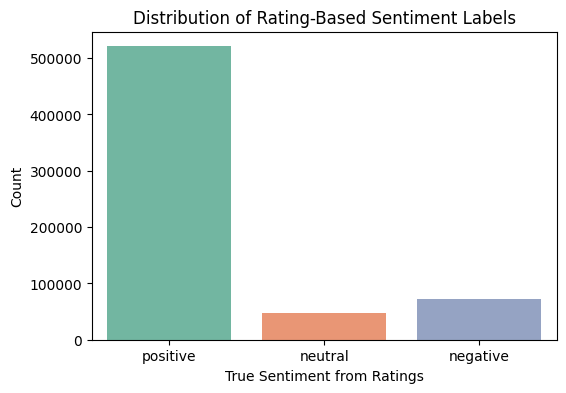

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment', order=['positive', 'neutral', 'negative'], palette='Set2')
plt.title('Distribution of Rating-Based Sentiment Labels')
plt.xlabel('True Sentiment from Ratings')
plt.ylabel('Count')
plt.show()


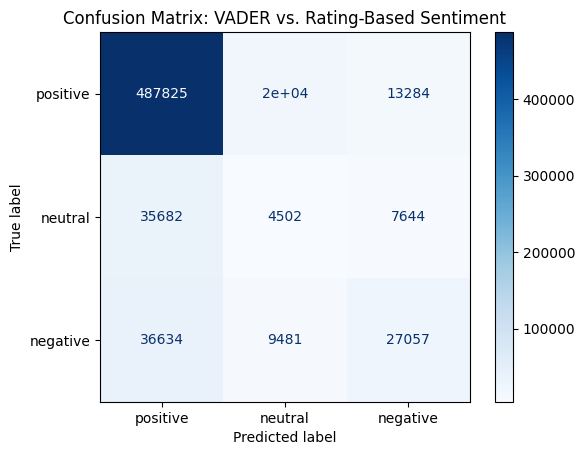

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(df['sentiment'], df['vader_sentiment'], labels=['positive', 'neutral', 'negative'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['positive', 'neutral', 'negative'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: VADER vs. Rating-Based Sentiment')
plt.show()


In [ ]:
comparison_table = pd.crosstab(df['sentiment'], df['vader_sentiment'], rownames=['Actual'], colnames=['VADER Predicted'])
display(comparison_table)


# Model Training

## TF-IDF Vectorization (Term Frequency–Inverse Document Frequency)

TF-IDF is a technique used to convert textual data into numerical features by weighing how important a word is in a document relative to all other documents. It increases the weight of rare but meaningful words and decreases the weight of common ones. This helps machine learning models focus on terms that truly define sentiment or topic.

A summary on how it works:
>
1. Term Frequency (TF)
Measures how often a word appears in a document.
More frequent = more important (but not always...).
>
2. Inverse Document Frequency (IDF)
Measures how rare a word is across all documents.
Words that appear in many documents (like "the", "good", "product") get down-weighted.

The Result:
TF-IDF gives high scores to words that are frequent in a document but rare overall — these are more likely to carry unique meaning.

In [ ]:
df.head()

,rating,parent_asin,verified_purchase,price,full_clean_text,sentiment,vader_score,vader_sentiment
0,5,B00CM36GAQ,1,24.96,excellent yummy excellent yummy great food great,positive,0.9732,positive
1,5,B0759B7KLH,1,35.52,delicious yum excellent good use beef broccoli...,positive,0.9371,positive
2,5,B005CD4196,1,2.78,great taste great making brownie crinkle cookie,positive,0.8481,positive
3,5,B0BG8M4XW7,1,17.87,yummy yummy tummy,positive,0.7783,positive
4,5,B00ESE0DC4,1,8.34,like drink wedding bouquet favorite tea favori...,positive,0.9451,positive


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

df = df.dropna(subset=['full_clean_text'])

# Convert text into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['full_clean_text'])

# Target variable
y = df['sentiment']


## Train/Test Splitting

To evaluate our machine learning model's performance on unseen data, we split the dataset into a training set (80%) and a test set (20%) using stratified sampling.
Stratification ensures that the distribution of sentiment classes (positive, neutral, negative) is maintained in both the training and test sets.

Since our data is heavily imbalanced — with the majority of reviews labeled as positive — we apply class weight rebalancing during model training.
This approach assigns higher weights to underrepresented classes (e.g., negative and neutral) so that the model does not default to always predicting the majority class.
By combining stratified splitting with class-weighted training, we aim to build a more fair and generalizable classifier.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


## Model Creation/Evaluation

###Logistic Regression

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

df = df.dropna(subset=['full_clean_text'])

# Updated TF-IDF: More features + use unigrams + bigrams
vectorizer = TfidfVectorizer(
    max_features=10000,          # ⬅️ More features (not just 5000)
    stop_words='english',
    ngram_range=(1, 2)            # ⬅️ (1,2) means both single words and two-word phrases
)

X = vectorizer.fit_transform(df['full_clean_text'])

# Target variable
y = df['sentiment']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(
    multi_class='multinomial',   # because you have 3 classes
    solver='saga',               # good for multinomial + large data
    class_weight='balanced',     # important because your data is imbalanced
    max_iter=1000                # more iterations so it converges
)

# Fit the model
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial', solver='saga')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive', 'Neutral']))


              precision    recall  f1-score   support

    Negative       0.72      0.41      0.52     14630
    Positive       0.21      0.67      0.32      9563
     Neutral       0.96      0.82      0.88    104120

    accuracy                           0.76    128313
   macro avg       0.63      0.63      0.57    128313
weighted avg       0.88      0.76      0.80    128313



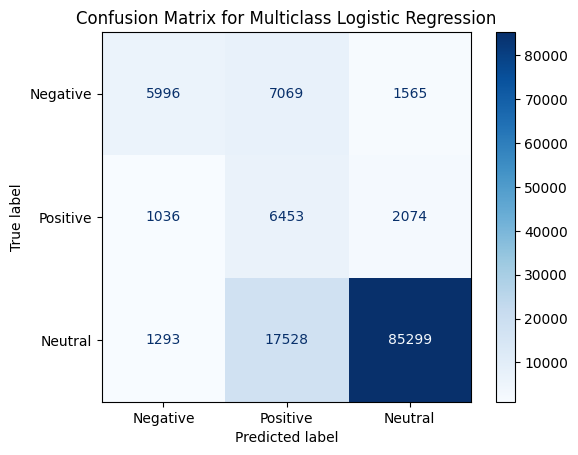

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive', 'Neutral'])
disp.plot(cmap='Blues', values_format='d')

plt.title('Confusion Matrix for Multiclass Logistic Regression')
plt.show()


In [ ]:
C_values = [0.5, 1, 2]
results = {}

for c in C_values:
    model = LogisticRegression(
        multi_class='multinomial',
        solver='saga',
        class_weight='balanced',
        max_iter=300,
        C=c
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True)
    macro_f1 = report['macro avg']['f1-score']

    results[c] = macro_f1
    print(f"C={c}: Macro F1-score = {macro_f1:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=0.5: Macro F1-score = 0.5736


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=1: Macro F1-score = 0.5416


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=2: Macro F1-score = 0.5117


In [ ]:
from sklearn.linear_model import LogisticRegression

final_model = LogisticRegression(
    solver='saga',
    class_weight='balanced',
    C=0.5,
    max_iter=500
)

final_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.5, class_weight='balanced', max_iter=500, solver='saga')

In [ ]:
from sklearn.metrics import classification_report

y_pred_final = final_model.predict(X_test)

print("⭐ Logistic Regression Results (After Tuning C=0.5) ⭐")
print(classification_report(y_test, y_pred_final, target_names=['Negative', 'Positive', 'Neutral']))


⭐ Logistic Regression Results (After Tuning C=0.5) ⭐
              precision    recall  f1-score   support

    Negative       0.48      0.72      0.58     14630
    Positive       0.23      0.43      0.30      9563
     Neutral       0.97      0.82      0.89    104120

    accuracy                           0.78    128313
   macro avg       0.56      0.66      0.59    128313
weighted avg       0.86      0.78      0.81    128313



### SVM (Support Vector Machine)

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/421Project/finalreviews.csv')
df.head()

<ipython-input-4-79fb6c6ee5ee>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/Shareddrives/421Project/finalreviews.csv')


,rating,parent_asin,verified_purchase,price,full_clean_text
0,5,B00CM36GAQ,1,24.96,excellent yummy excellent yummy great food great
1,5,B0759B7KLH,1,35.52,delicious yum excellent good use beef broccoli...
2,5,B005CD4196,1,2.78,great taste great making brownie crinkle cookie
3,5,B0BG8M4XW7,1,17.87,yummy yummy tummy
4,5,B00ESE0DC4,1,8.34,like drink wedding bouquet favorite tea favori...


In [ ]:
# Function to classify sentiment
def label_sentiment(rating):
    if rating in [1, 2]:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

# Apply the function
df['sentiment'] = df['rating'].apply(label_sentiment)
display(df[['rating', 'sentiment']].head())

,rating,sentiment
0,5,positive
1,5,positive
2,5,positive
3,5,positive
4,5,positive


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

df = df.dropna(subset=['full_clean_text'])

# Convert text into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['full_clean_text'])

# Target variable
y = df['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

📊 Classification Report - SVM
              precision    recall  f1-score   support

    negative       0.61      0.70      0.65     14630
     neutral       0.34      0.34      0.34      9563
    positive       0.94      0.92      0.93    104120

    accuracy                           0.85    128313
   macro avg       0.63      0.65      0.64    128313
weighted avg       0.86      0.85      0.86    128313



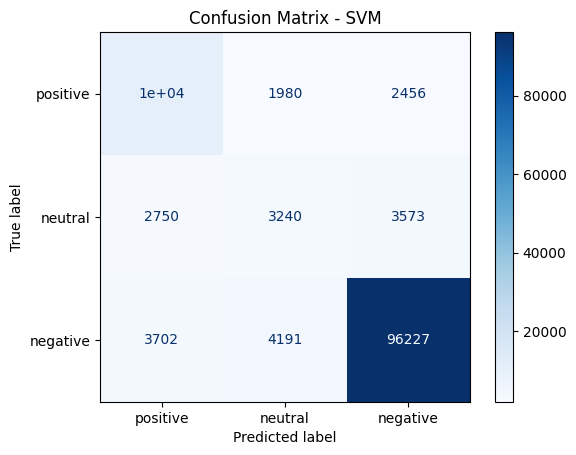

In [ ]:
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

# Initialize and train SVM
svm_model = LinearSVC(class_weight='balanced')
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print("📊 Classification Report - SVM")
print(classification_report(y_test, y_pred_svm))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, display_labels=['positive', 'neutral', 'negative'], cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=8000,
    stop_words='english',
    ngram_range=(1, 2),  # unigrams + bigrams
    min_df=3,            # ignore rare words
    max_df=0.9           # ignore too-common words
)

X = vectorizer.fit_transform(df['full_clean_text'])
y = df['sentiment']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'loss': ['squared_hinge'],
    'class_weight': ['balanced']
}

grid_svm = GridSearchCV(
    estimator=LinearSVC(max_iter=2000),
    param_grid=param_grid,
    cv=3,
    scoring='f1_macro',
    verbose=1,
    n_jobs=-1
)

grid_svm.fit(X_train, y_train)
print("Best Parameters:", grid_svm.best_params_)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'loss': 'squared_hinge'}


📊 Classification Report - Tuned SVM
              precision    recall  f1-score   support

    negative       0.63      0.70      0.66     14630
     neutral       0.36      0.36      0.36      9563
    positive       0.94      0.93      0.94    104120

    accuracy                           0.86    128313
   macro avg       0.64      0.66      0.65    128313
weighted avg       0.86      0.86      0.86    128313



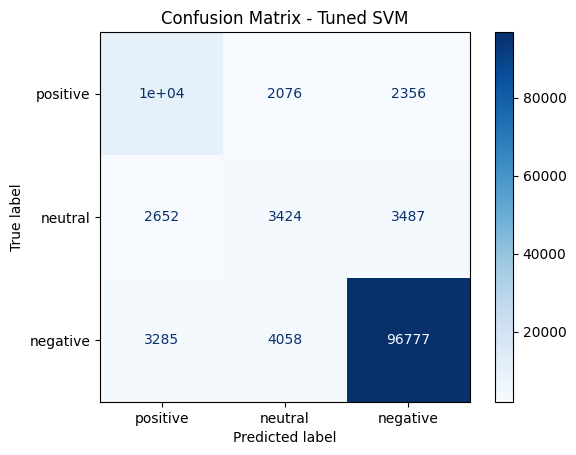

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = grid_svm.best_estimator_.predict(X_test)

print("📊 Classification Report - Tuned SVM")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['positive', 'neutral', 'negative'], cmap='Blues')
plt.title("Confusion Matrix - Tuned SVM")
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.svm import LinearSVC

# No need for class_weight='balanced' anymore — SMOTE handles that
svm_smote = LinearSVC(max_iter=2000)
svm_smote.fit(X_train_resampled, y_train_resampled)


LinearSVC(max_iter=2000)

📊 Classification Report - SVM with SMOTE
              precision    recall  f1-score   support

    negative       0.58      0.69      0.63     14630
     neutral       0.26      0.43      0.33      9563
    positive       0.95      0.87      0.91    104120

    accuracy                           0.82    128313
   macro avg       0.60      0.66      0.62    128313
weighted avg       0.86      0.82      0.84    128313



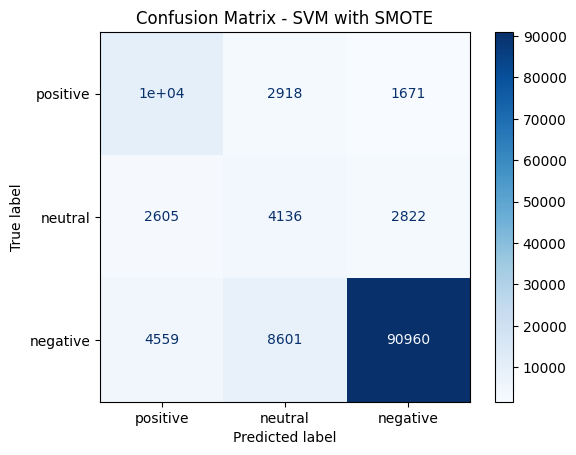

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_smote = svm_smote.predict(X_test)

print("📊 Classification Report - SVM with SMOTE")
print(classification_report(y_test, y_pred_smote))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_smote,
    display_labels=['positive', 'neutral', 'negative'],
    cmap='Blues'
)
plt.title("Confusion Matrix - SVM with SMOTE")
plt.show()

Smote is not good, it does not improve the model..SMOTE can create noisy or ambiguous synthetic samples.. Linear SVMs are sensitive to noisy or redundant data, which can throw off the hyperplane. Let's apply manual class balancing..

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import pandas as pd

results = []

# Loop through neutral weight values from 1 to 5
for neutral_weight in range(1, 6):
    print(f"\n🔁 Testing class weight: neutral={neutral_weight}")

    weights = {'positive': 1, 'neutral': neutral_weight, 'negative': 2}

    model = LinearSVC(class_weight=weights, max_iter=2000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    results.append({
        'neutral_weight': neutral_weight,
        'accuracy': report['accuracy'],
        'macro_f1': report['macro avg']['f1-score'],
        'neutral_f1': report['neutral']['f1-score'],
        'positive_f1': report['positive']['f1-score'],
        'negative_f1': report['negative']['f1-score']
    })

# Create DataFrame with results
results_df = pd.DataFrame(results)
results_df.set_index('neutral_weight', inplace=True)
print("\n📊 Comparison Table:")
display(results_df.style.background_gradient(cmap='Blues'))



🔁 Testing class weight: neutral=1

🔁 Testing class weight: neutral=2

🔁 Testing class weight: neutral=3

🔁 Testing class weight: neutral=4

🔁 Testing class weight: neutral=5

📊 Comparison Table:


,accuracy,macro_f1,neutral_f1,positive_f1,negative_f1
neutral_weight,,,,,
1,0.873762,0.575523,0.114047,0.940539,0.671982
2,0.874300,0.614116,0.229266,0.940949,0.672134
3,0.872608,0.635337,0.298892,0.940709,0.666409
4,0.869982,0.644501,0.336136,0.940397,0.656970
5,0.866701,0.647315,0.355644,0.939690,0.646611


Notice that with the neutral weight 4 it is the best

📊 Classification Report - Manual Weights SVM
              precision    recall  f1-score   support

    negative       0.70      0.62      0.66     14630
     neutral       0.38      0.30      0.34      9563
    positive       0.92      0.96      0.94    104120

    accuracy                           0.87    128313
   macro avg       0.67      0.62      0.64    128313
weighted avg       0.86      0.87      0.86    128313



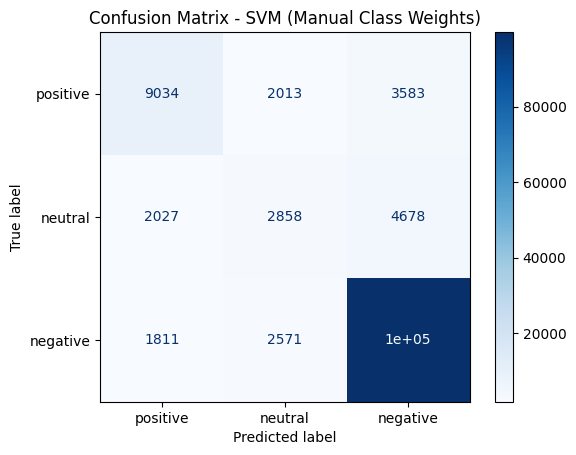

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Define manual weights — emphasize neutral and negative
manual_weights = {
    'positive': 1,
    'neutral': 4,   # boost neutral performance
    'negative': 2   # also support underrepresented class
}

# 2. Initialize and train the model
svc_manual = LinearSVC(class_weight=manual_weights, max_iter=2000)
svc_manual.fit(X_train, y_train)

# 3. Predict on test set
y_pred_manual = svc_manual.predict(X_test)

# 4. Evaluate
print("📊 Classification Report - Manual Weights SVM")
print(classification_report(y_test, y_pred_manual))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_manual,
    display_labels=['positive', 'neutral', 'negative'],
    cmap='Blues'
)
plt.title("Confusion Matrix - SVM (Manual Class Weights)")
plt.show()


### Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Just to be safe: drop rows without text
df = df.dropna(subset=['full_clean_text'])

# TF-IDF Vectorizer (reuse same config from logistic regression)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=1000,
    stop_words='english',
    ngram_range=(1, 2)
)

# Transform the full_clean_text column into TF-IDF vectors
X = vectorizer.fit_transform(df['full_clean_text'])

# Target variable
y = df['sentiment']

In [ ]:
# Train/test split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
# Predict sentiment on test set
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

    negative       0.68      0.49      0.57     14630
     neutral       0.44      0.07      0.12      9563
    positive       0.88      0.98      0.93    104120

    accuracy                           0.86    128313
   macro avg       0.66      0.51      0.54    128313
weighted avg       0.82      0.86      0.83    128313



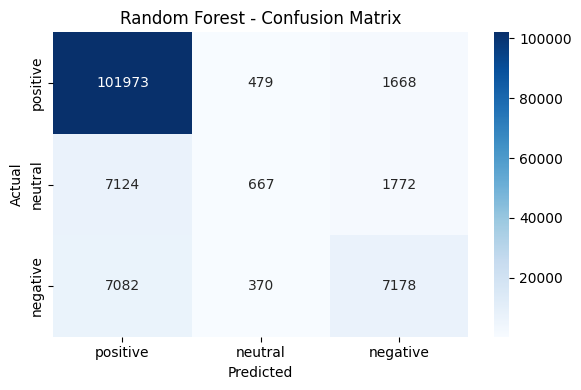

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['positive', 'neutral', 'negative'])

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['positive', 'neutral', 'negative'],
            yticklabels=['positive', 'neutral', 'negative'])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
df['sentiment'].value_counts(normalize=True)

,proportion
sentiment,
positive,0.811454
negative,0.114017
neutral,0.074529


In [ ]:
# Step 1: Load libraries
from sentence_transformers import SentenceTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Sample the original data for speed (adjust n as needed)
df_sample = df.sample(n=100000, random_state=42).copy()

# Step 3: Prepare text and labels
texts = df_sample['full_clean_text'].tolist()
labels = df_sample['sentiment'].tolist()

# Step 4: Generate sentence embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')  # 384-dim vector per review
embeddings = model.encode(texts, show_progress_bar=True)

Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

In [ ]:
# Step 5: Combine embeddings and labels into a DataFrame
df_embed = pd.DataFrame(embeddings)
df_embed['label'] = labels

# Step 6: Stratified downsampling — balance classes to the size of the smallest one
min_class_size = df_embed['label'].value_counts().min()

df_balanced = df_embed.groupby('label').apply(
    lambda x: x.sample(min_class_size, random_state=42)
).reset_index(drop=True)

# Step 7: Split features and labels
X_bal = df_balanced.drop(columns='label').values
y_bal = df_balanced['label'].values

<ipython-input-16-5d2dfdb65031>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df_embed.groupby('label').apply(


In [ ]:
# Step 6: Stratified downsampling — balance classes to the size of the smallest one
min_class_size = df_embed['label'].value_counts().min()

df_balanced = df_embed.groupby('label').apply(
    lambda x: x.sample(min_class_size, random_state=42)
).reset_index(drop=True)

<ipython-input-17-fe66af97b3a6>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df_embed.groupby('label').apply(


In [ ]:
# Step 7: Split features and labels
X_bal = df_balanced.drop(columns='label').values
y_bal = df_balanced['label'].values

In [ ]:
# Step 8: Train/test split (stratified again for evaluation)
X_train, X_test, y_train, y_test = train_test_split(
    X_bal, y_bal, test_size=0.2, stratify=y_bal, random_state=42
)

In [ ]:
# Step 9: Train Random Forest model
rf_model = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=50, n_jobs=-1,
                       random_state=42)

In [ ]:
# Step 10: Predict and evaluate
y_pred = rf_model.predict(X_test)

print("📊 Classification Report (Stratified Downsampled):")
print(classification_report(y_test, y_pred, digits=4))

📊 Classification Report (Stratified Downsampled):
              precision    recall  f1-score   support

    negative     0.5233    0.5625    0.5422       160
     neutral     0.4524    0.3540    0.3972       161
    positive     0.5978    0.6832    0.6377       161

    accuracy                         0.5332       482
   macro avg     0.5245    0.5333    0.5257       482
weighted avg     0.5245    0.5332    0.5257       482



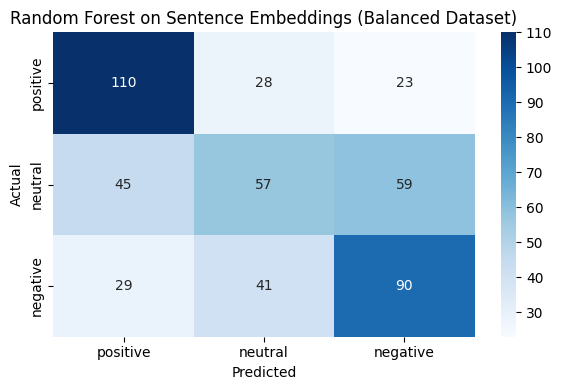

In [ ]:
# Confusion Matrix
labels_order = ['positive', 'neutral', 'negative']
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels_order)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels_order, yticklabels=labels_order)
plt.title("Random Forest on Sentence Embeddings (Balanced Dataset)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

### XGBoost

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/Shareddrives/421Project/finalreviews.csv')
df.head()

# Function to classify sentiment
def label_sentiment(rating):
    if rating in [1, 2]:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

# Apply the function
df['sentiment'] = df['rating'].apply(label_sentiment)
display(df[['rating', 'sentiment']].head())

<ipython-input-3-e239dc252025>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/Shareddrives/421Project/finalreviews.csv')


,rating,sentiment
0,5,positive
1,5,positive
2,5,positive
3,5,positive
4,5,positive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
df = df.dropna(subset=['full_clean_text'])
# Clean TF-IDF setup
vectorizer = TfidfVectorizer(
    max_features=10000,
    stop_words='english',
    ngram_range=(1, 2),
    min_df=10,
    max_df=0.85
)

# Transform text
X = vectorizer.fit_transform(df['full_clean_text'])

# Encode sentiment
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
from xgboost import XGBClassifier

best_xgb = XGBClassifier(
    objective='multi:softprob',
    colsample_bytree=0.8,
    learning_rate=0.3,
    max_depth=7,
    n_estimators=200,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

best_xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:36:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

              precision    recall  f1-score   support

    negative       0.73      0.54      0.62     14630
     neutral       0.46      0.13      0.20      9563
    positive       0.89      0.98      0.93    104120

    accuracy                           0.87    128313
   macro avg       0.69      0.55      0.59    128313
weighted avg       0.84      0.87      0.84    128313



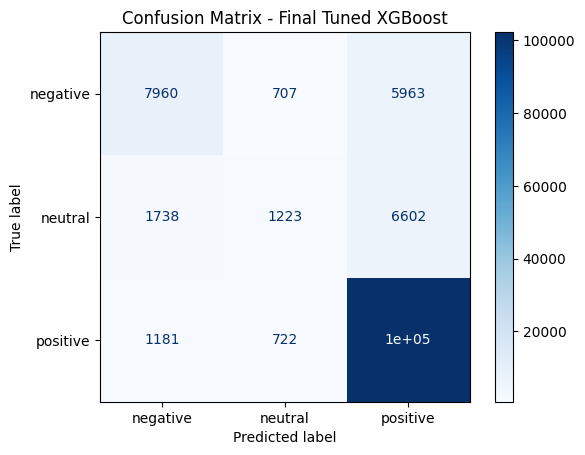

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict and evaluate
y_pred = best_xgb.predict(X_test)

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=label_encoder.classes_, cmap='Blues'
)
plt.title("Confusion Matrix - Final Tuned XGBoost")
plt.show()